### Instalación de Winrose y Dependencias en Google Colab
Winrose es una librería de Python que permite la creación de gráficos de rosa de los vientos, una herramienta esencial para el análisis de datos de viento en aplicaciones meteorológicas, energías renovables y estudios ambientales. Con Winrose, puedes:

    Visualizar la distribución de la velocidad y dirección del viento.

    Analizar patrones de viento a lo largo del tiempo.

    Ajustar distribuciones estadísticas, como la distribución de Weibull, para modelar el comportamiento del viento.

Winrose es ampliamente utilizado en la industria eólica para la evaluación de recursos eólicos y la planificación de parques eólicos.

Además de Winrose, utilizaremos las siguientes librerías de Python:

    numpy: Para operaciones numéricas.

    pandas: Para la manipulación de datos.

    matplotlib: Para la creación de gráficos.

Estas librerías ya están preinstaladas en Google Colab, por lo que no es necesario instalarlas manualmente

In [2]:
# Instalación de Winrose y dependencias
!pip install windrose

## Introducción a los Datos de Viento y la Distribución de Weibull

Los datos de viento se componen principalmente de dos variables:

    Velocidad del viento (m/s): Indica la intensidad del viento.

    Dirección del viento (grados): Indica la dirección de donde proviene el viento, medida en grados (0° = Norte, 90° = Este, 180° = Sur, 270° = Oeste).

Para modelar la velocidad del viento, se utiliza comúnmente la distribución de Weibull, una distribución estadística que describe la probabilidad de que ocurran ciertas velocidades de viento. La distribución de Weibull se caracteriza por dos parámetros:

    Parámetro de forma (k): Controla la forma de la distribución.

    Parámetro de escala (A): Controla la escala de la distribución.

La distribución de Weibull es especialmente útil en la industria eólica porque se ajusta bien a los datos de viento y permite predecir la energía generada por turbinas eólicas.

In [3]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [21]:
# Generar datos sintéticos de viento
np.random.seed(42)
wind_speeds = np.random.weibull(2, 1000) * 10  # Distribución de Weibull con forma 2 y escala 10
wind_directions = np.random.uniform(0, 360, 1000)  # Direcciones aleatorias entre 0 y 360 grados

# Crear un DataFrame con los datos sintéticos
data = pd.DataFrame({
    'speed': wind_speeds,
    'direction': wind_directions
})

# Mostrar las primeras filas de los datos
print("Datos sintéticos generados:")
print(data.head())

Datos sintéticos generados:
       speed   direction
0   6.850315   66.647854
1  17.349702  195.084341
2  11.474954  314.260501
3   9.554803  263.600959
4   4.118554  290.362013


In [27]:
#Desviación estándar
print(data.speed.std())
#Media
print(data.speed.mean())
#Descripción de los datos
data.describe()

4.620079762127732
8.713598735603366


,speed,direction
count,1000.000000,1000.000000
mean,8.713599,182.526230
std,4.620080,105.188362
min,0.681380,1.158575
25%,5.187957,86.786738
50%,8.287233,186.744206
75%,11.678309,273.767421
max,28.587490,359.788941


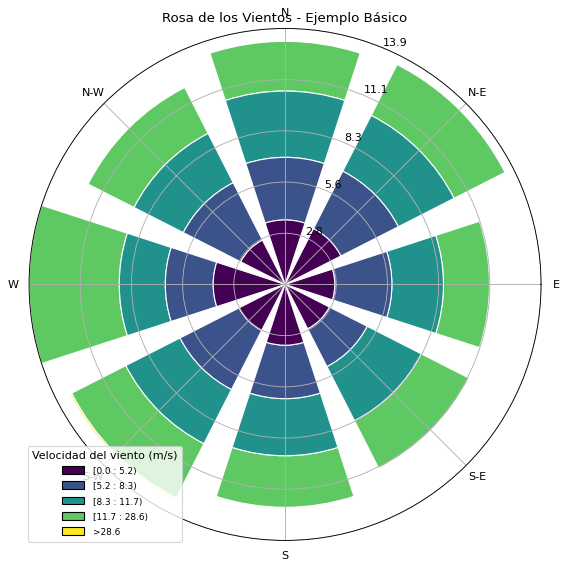

In [31]:
# Ejemplo 1: Gráfico básico de la rosa de los vientos
ax = WindroseAxes.from_ax()
ax.bar(data['direction'], data['speed'], nsector=8, bins=[0,5.18,8.28,11.67,28.58], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Velocidad del viento (m/s)")
plt.title("Rosa de los Vientos - Ejemplo Básico")
plt.show()

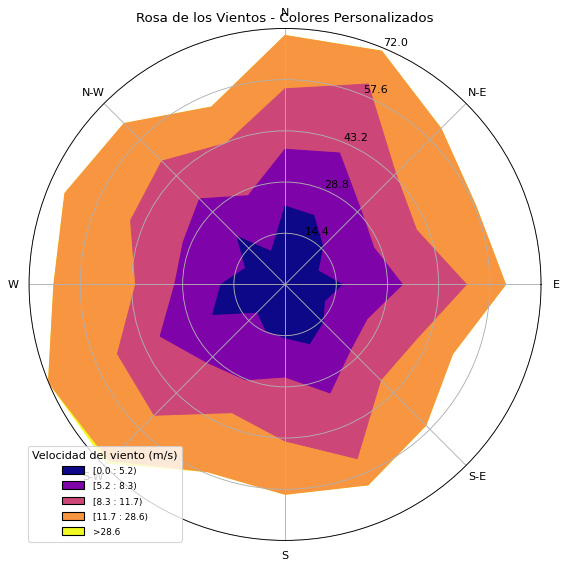

In [35]:
# Ejemplo 2: Gráfico de la rosa de los vientos con colores personalizados
ax = WindroseAxes.from_ax()
ax.contourf(data['direction'], data['speed'], bins=[0,5.18,8.28,11.67,28.58], cmap=plt.cm.plasma)
ax.set_legend(title="Velocidad del viento (m/s)")
plt.title("Rosa de los Vientos - Colores Personalizados")
plt.show()

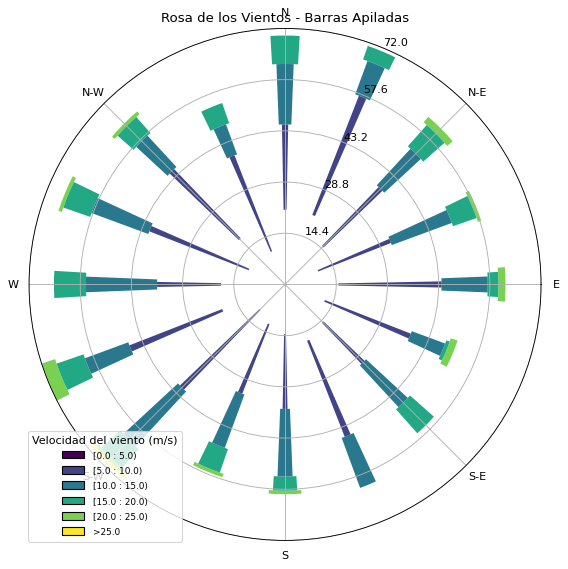

In [25]:
# Ejemplo 3: Gráfico de la rosa de los vientos con barras apiladas
ax = WindroseAxes.from_ax()
ax.box(data['direction'], data['speed'], bins=np.arange(0, 30, 5))
ax.set_legend(title="Velocidad del viento (m/s)")
plt.title("Rosa de los Vientos - Barras Apiladas")
plt.show()


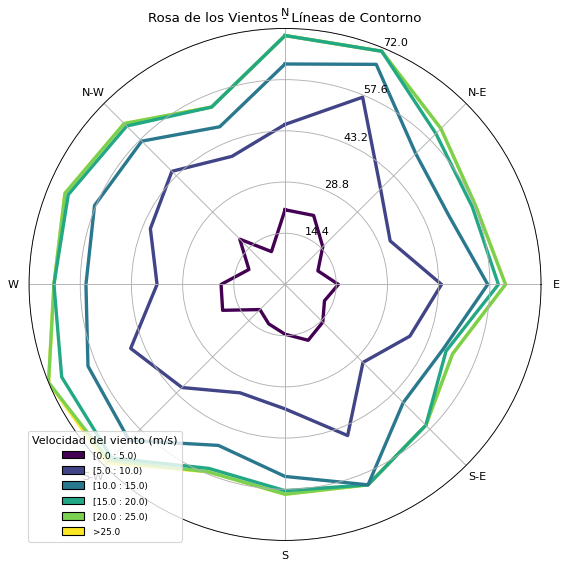

In [26]:

# Ejemplo 4: Gráfico de la rosa de los vientos con líneas de contorno
ax = WindroseAxes.from_ax()
ax.contour(data['direction'], data['speed'], bins=np.arange(0, 30, 5), cmap=plt.cm.viridis, lw=3)
ax.set_legend(title="Velocidad del viento (m/s)")
plt.title("Rosa de los Vientos - Líneas de Contorno")
plt.show()

Notas Adicionales

    Asegúrate de que los datos de entrada (velocidad y dirección del viento) estén en el formato correcto (velocidad en m/s y dirección en grados).

    Puedes personalizar los gráficos cambiando los colores, los rangos de las barras (bins), o los estilos de las líneas.

Fuente de windrose:
https://python-windrose.github.io/windrose/